In [1]:
import numpy as np

# 加载数据
X = np.load('checkboard_plot_10/X.npy')  # 黑色区域
y = np.load('checkboard_plot_10/y.npy')      # 红色区域

# 合并特征和标签
features = X
targets = y

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('checkboard_plot_10/features.npy', features)  # 保存打乱的特征数组
np.save('checkboard_plot_10/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (11000, 2)
打乱后的标签数组形状： (11000,)
前5个特征：
 [[-0.23410499  0.87720125]
 [ 0.98231149  1.2455915 ]
 [ 2.30112996  0.34528129]
 [ 0.31313535  2.05912531]
 [ 0.21596433  1.55132262]]
前5个标签： [0 0 0 0 0]


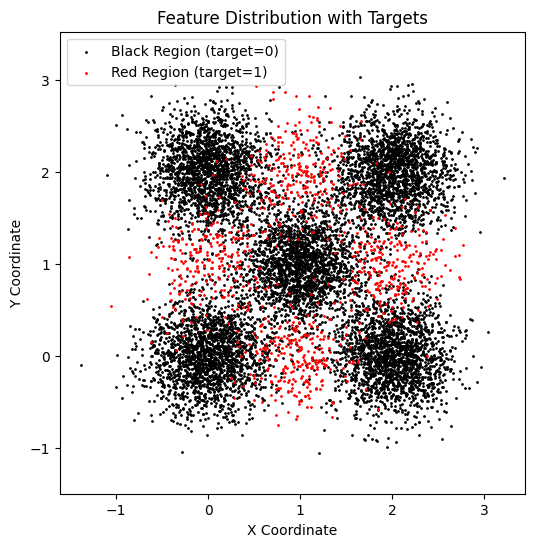

In [3]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('checkboard_plot_10/features.npy')
y = np.load('checkboard_plot_10/targets.npy')

X_test = np.load('checkboard_plot_10/X_test.npy')
y_test = np.load('checkboard_plot_10/y_test.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-14 19:29:27,090 - DualGranularBalancedDeepForest
the shape of training samples: (11000, 2) - 2024-12-14 19:29:27,090 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-14 19:29:27,091 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-14 19:29:27,091 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 19:29:27,092 - DualGranularBalancedDeepForest
The shape of x_train is (11000, 2) - 2024-12-14 19:29:27,092 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9227, f1_score=0.7246, auc=0.8936, gmean=0.6319, sen=0.4100, spe=0.9740, aupr=0.5462 - 2024-12-14 19:29:29,265 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9250, f1_score=0.7391, auc=0.8785, gmean=0.6580, sen=0.4450, spe=0.9730, aupr=0.5028 - 2024-12-14 19:29:29,270 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9268, f1_score=0.7399, auc=0.8913, gmean=0.6516, sen=0.4350, spe=0.9760, aupr=0.5478 - 2024-12-14 19:29:29,275 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9232, f1_score=0.7356, auc=0.8791, gmean=0.6573, sen=0.4450, spe=0.9710, aupr=0.4979 - 2024-12-14 19:29:29,281 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9255, f1_score=0.7532, auc=0.9064, gmean=0.6924, sen=0.4950, spe=0.9685, aupr=0.5289 - 2024-12-14 19:29:29,287 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9123, f1_score=0.7173, auc=0.8725, gmean=0.6568, sen=0.4500, spe=0.9585, aupr=0.4815 - 2024-12-14 19:29:41,113 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9177, f1_score=0.7412, auc=0.8828, gmean=0.6959, sen=0.5050, spe=0.9590, aupr=0.5125 - 2024-12-14 19:29:41,118 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9236, f1_score=0.7533, auc=0.8847, gmean=0.7015, sen=0.5100, spe=0.9650, aupr=0.5652 - 2024-12-14 19:29:41,123 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9195, f1_score=0.7316, auc=0.8918, gmean=0.6630, sen=0.4550, spe=0.9660, aupr=0.5495 - 2024-12-14 19:29:41,130 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9186, f1_score=0.7391, auc=0.8855, gmean=0.6864, sen=0.4900, spe=0.9615, aupr=0.5559 - 2024-12-14 19:29:41,135 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9491, f1_score=0.8439, auc=0.9344, gmean=0.8284, sen=0.7050, spe=0.9735, aupr=0.7631 - 2024-12-14 19:29:59,615 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9418, f1_score=0.8224, auc=0.9265, gmean=0.8057, sen=0.6700, spe=0.9690, aupr=0.7078 - 2024-12-14 19:29:59,621 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9332, f1_score=0.8019, auc=0.8974, gmean=0.7934, sen=0.6550, spe=0.9610, aupr=0.6708 - 2024-12-14 19:29:59,626 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9323, f1_score=0.8043, auc=0.9092, gmean=0.8069, sen=0.6800, spe=0.9575, aupr=0.6935 - 2024-12-14 19:29:59,632 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9445, f1_score=0.8330, auc=0.9214, gmean=0.8236, sen=0.7000, spe=0.9690, aupr=0.7097 - 2024-12-14 19:29:59,638 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9523, f1_score=0.8455, auc=0.9310, gmean=0.8077, sen=0.6650, spe=0.9810, aupr=0.7856 - 2024-12-14 19:30:17,660 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9591, f1_score=0.8704, auc=0.9344, gmean=0.8440, sen=0.7250, spe=0.9825, aupr=0.8046 - 2024-12-14 19:30:17,665 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9509, f1_score=0.8407, auc=0.9064, gmean=0.8014, sen=0.6550, spe=0.9805, aupr=0.7591 - 2024-12-14 19:30:17,671 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9505, f1_score=0.8364, auc=0.9288, gmean=0.7897, sen=0.6350, spe=0.9820, aupr=0.7724 - 2024-12-14 19:30:17,677 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9491, f1_score=0.8410, auc=0.9284, gmean=0.8174, sen=0.6850, spe=0.9755, aupr=0.7790 - 2024-12-14 19:30:17,682 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (11000, 10)
num_layers_before_append: 3
num_layers: 4
last_layer_index 2
last_layer_index 2
UncertaintyAwareDeepForest - Accuracy: 0.9255
UncertaintyAwareDeepForest - AUC: 0.9040
UncertaintyAwareDeepForest - AUPR: 0.5917
UncertaintyAwareDeepForest - Sensitivity: 0.5050
UncertaintyAwareDeepForest - Specificity: 0.9675
UncertaintyAwareDeepForest - G-Mean: 0.6990
UncertaintyAwareDeepForest - F1 Macro: 0.7556


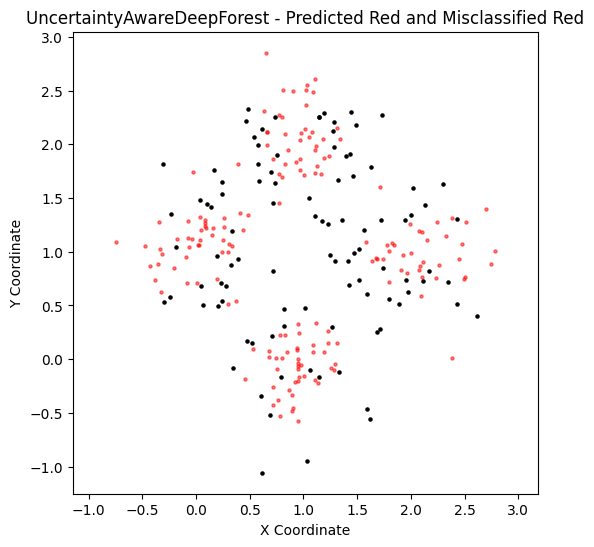

In [8]:
import os
# 配置输出文件夹
output_dir = "checkboard_plot_10"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training BalanceCascade...
BalanceCascade - Accuracy: 0.9145
BalanceCascade - AUC: 0.8538
BalanceCascade - AUPR: 0.5461
BalanceCascade - Sensitivity: 0.6750
BalanceCascade - Specificity: 0.9385
BalanceCascade - G-Mean: 0.7959
BalanceCascade - F1 Macro: 0.7709
Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 0.9186
SelfPacedEnsemble - AUC: 0.9027
SelfPacedEnsemble - AUPR: 0.5479
SelfPacedEnsemble - Sensitivity: 0.6550
SelfPacedEnsemble - Specificity: 0.9450
SelfPacedEnsemble - G-Mean: 0.7867
SelfPacedEnsemble - F1 Macro: 0.7744
Training UnderBagging...
UnderBagging - Accuracy: 0.8741
UnderBagging - AUC: 0.9122
UnderBagging - AUPR: 0.5833
UnderBagging - Sensitivity: 0.7800
UnderBagging - Specificity: 0.8835
UnderBagging - G-Mean: 0.8301
UnderBagging - F1 Macro: 0.7285
Training EasyEnsemble...
EasyEnsemble - Accuracy: 0.7505
EasyEnsemble - AUC: 0.7525
EasyEnsemble - AUPR: 0.1574
EasyEnsemble - Sensitivity: 0.8100
EasyEnsemble - Specificity: 0.7445
Eas

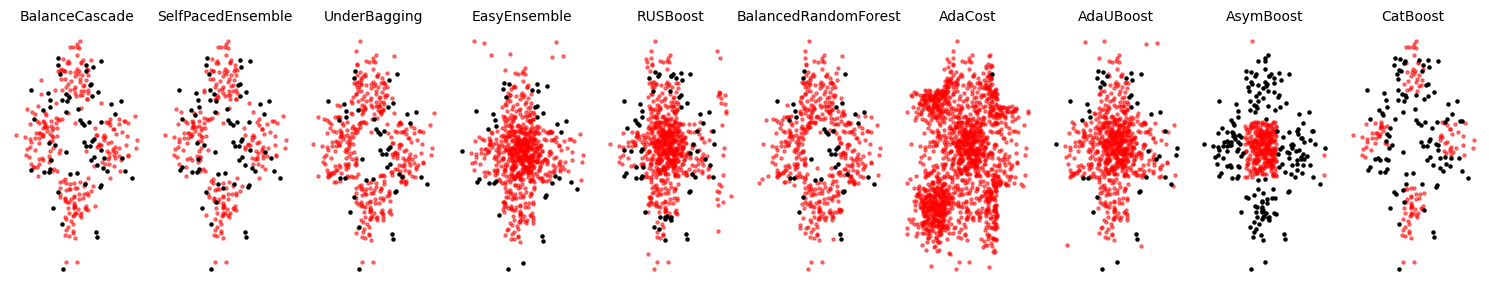

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "checkboard_plot_10"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50),
    'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9259
OverBagging - AUC: 0.8677
OverBagging - AUPR: 0.5262
OverBagging - Sensitivity: 0.4700
OverBagging - Specificity: 0.9715
OverBagging - G-Mean: 0.6757
OverBagging - F1 Macro: 0.7477
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.7477
SMOTEBoost - AUC: 0.7488
SMOTEBoost - AUPR: 0.1586
SMOTEBoost - Sensitivity: 0.7950
SMOTEBoost - Specificity: 0.7430
SMOTEBoost - G-Mean: 0.7686
SMOTEBoost - F1 Macro: 0.6035
Training OverBoost...
OverBoost - Accuracy: 0.7423
OverBoost - AUC: 0.7506
OverBoost - AUPR: 0.1633
OverBoost - Sensitivity: 0.7850
OverBoost - Specificity: 0.7380
OverBoost - G-Mean: 0.7611
OverBoost - F1 Macro: 0.5976
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.6800
KmeansSMOTEBoost - AUC: 0.6211
KmeansSMOTEBoost - AUPR: 0.1306
KmeansSMOTEBoost - Sensitivity: 0.2850
KmeansSMOTEBoost - Specificity: 0.7195
KmeansSMOTEBoost - G-Mean: 0.4528
KmeansSMOTEBoost - F1 Macro: 0.4714
Training SMOTEBagging...
SMOTEBagging - 

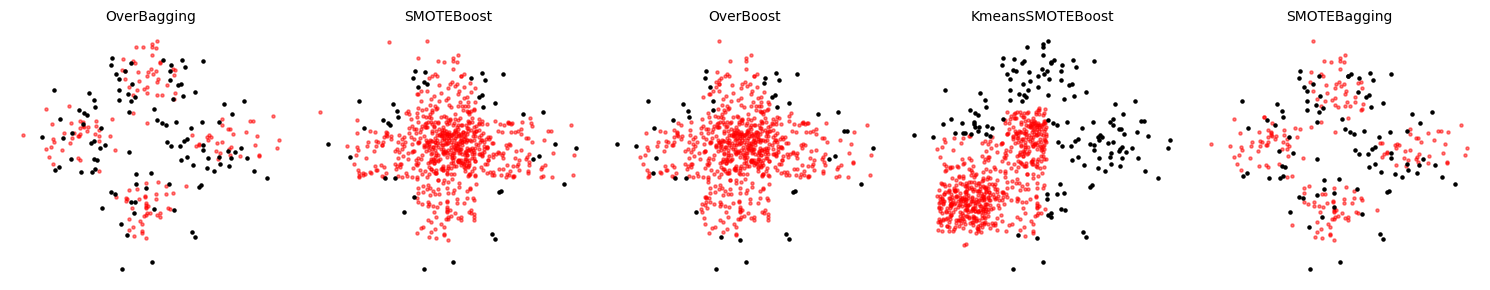

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "checkboard_plot_10"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
